# **Classificação de textos com spaCy**

### **Etapa 1: Importação e instalação das bibliotecas**

In [1]:
# Já instalado na env_nlp que foi utilizada para o curso atual
# !pip install spacy==2.2.3

In [2]:
import spacy
spacy.__version__

'2.2.3'

In [3]:
# pacotes da língua portuguesa já baixado e instalado na env_nlp
# !python3 -m spacy download pt

In [4]:
import pandas as pd
import string  # biblioteca para pré-processamento
import spacy
import random  # biblioteca para números aleatórios
import seaborn as sns  # biblioteca para geração de gráficos
import numpy as np

### **Etapa 2: Carregamento da base de dados**

In [5]:
base_dados = pd.read_csv('/home/lucas/Documentos/Cursos/Udemy/Processamento de Linguagem Natural com spaCy e Python/1_Introdução/base_treinamento.txt', encoding='utf-8')

In [6]:
base_dados.shape

(196, 2)

In [8]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [9]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


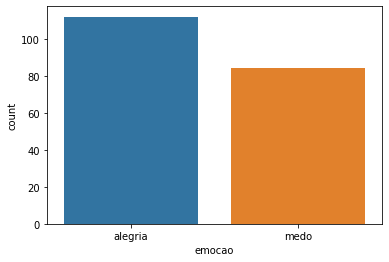

In [15]:
# o ponto e vírgula no final do código funciona para 'limpar' o gráfico abaixo de textos inseridos
sns.countplot(base_dados['emocao'], label='Contagem');

### **Etapa 3: Função para pré-processamento dos textos**

In [16]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [25]:
print(stop_words)

{'que', 'quando', 'número', 'segundo', 'inicio', 'naquela', 'maioria', 'pouca', 'tu', 'nova', 'conhecida', 'põe', 'fazeis', 'quinze', 'nesse', 'primeira', 'segunda', 'valor', 'sistema', 'quanto', 'oitavo', 'cedo', 'estará', 'direita', 'deste', 'sétima', 'podem', 'diante', 'posição', 'sempre', 'seria', 'até', 'dezanove', 'terceira', 'lá', 'aquele', 'nossa', 'forma', 'você', 'quem', 'foste', 'mil', 'cada', 'faço', 'somos', 'os', 'nada', 'vinda', 'nossos', 'apenas', 'estive', 'vossas', 'duas', 'menor', 'na', 'sete', 'antes', 'tais', 'cima', 'primeiro', 'oito', 'enquanto', 'demais', 'és', 'meus', 'novas', 'sétimo', 'dezasseis', 'meio', 'sobre', 'no', 'custa', 'esta', 'as', 'ela', 'tivestes', 'nuns', 'seis', 'corrente', 'aqueles', 'povo', 'sua', 'quê', 'longe', 'muitos', 'ver', 'tendes', 'bastante', 'todas', 'irá', 'têm', 'posso', 'são', 'qual', 'todo', 'zero', 'esteve', 'sem', 'área', 'tudo', 'sexto', 'pelo', 'ser', 'me', 'tivemos', 'estes', 'eventual', 'apoia', 'quarto', 'vai', 'doze', 's

In [19]:
len(stop_words)

413

In [20]:
# carregando o modelo de pln (natural language process) padrão do spacy para a variável pln
pln = spacy.load('pt')

In [21]:
pln

In [30]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = pln(texto)
    
    lista = []
    for token in documento:
        # lista.append(token.text)
        lista.append(token.lemma_)
    
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [31]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural cursar curitiba'

### **Etapa 4: Pré-processamento da base de dados**

#### Limpeza dos textos

In [32]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [33]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [34]:
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


#### Tratamento da classe

In [37]:
exemplo_base_dados =[['este trabalho é agradável', {"ALEGRIA": True, "MEDO": False}],
                     ['este lugar continua assustador', {"ALEGRIA": False, "MEDO": True}]]

In [39]:
type(exemplo_base_dados)

list

In [40]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [41]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [42]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [43]:
type(exemplo_base_dados[0][1])

dict

In [48]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
    # print(texto, emocao)
    if emocao == 'alegria':
        dic = ({'ALEGRIA': True, 'MEDO': False})
    elif emocao == 'medo':
        dic = ({'ALEGRIA': False, 'MEDO': True})
    
    base_dados_final.append([texto, dic.copy()])

In [49]:
len(base_dados_final)

196

In [50]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [51]:
base_dados_final[0][0]

'trabalhar agradável'

In [52]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [53]:
type(base_dados_final[0][1])

dict

In [54]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

## **Etapa 5: Criação do classificador**

In [56]:
# o spacy por "trás dos panos" trabalha com redes neurais
modelo = spacy.blank('pt')  # função blank() serve para inicializar um novo modelo em branco
categorias = modelo.create_pipe('textcat')
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
modelo.add_pipe(categorias)
historico = []

In [58]:
modelo.begin_training()  # iniciando o treinamento

for epoca in range(1000): # definindo a qtd de epocas em 1000
    random.shuffle(base_dados_final)  # função shuffle realiza a "mistura" dos dados, pois as frases de alegria estao no comeco e medo no final, então será misturado
    losses = {}
    for batch in spacy.util.minibatch(base_dados_final, 30):  # será passado para a rede neural com batch no tamanho de 30 (30 em 30 registros será atualizado os pesos)
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]  # a lista annotations terá as categorias (entidades)
        modelo.update(textos, annotations, losses=losses)
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

{'textcat': 0.00715910381404683}
{'textcat': 7.953491376611055e-08}
{'textcat': 3.1534598932125846e-08}
{'textcat': 1.335503696520135e-08}
{'textcat': 9.400245637447568e-09}
{'textcat': 6.614138708949113e-09}
{'textcat': 4.805459474788165e-09}
{'textcat': 3.4738416310187148e-09}
{'textcat': 2.7091373866472424e-09}
{'textcat': 2.649849673019844e-09}


In [60]:
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [62]:
historico_loss = np.array(historico_loss)
historico_loss

array([7.15910381e-03, 7.95349138e-08, 3.15345989e-08, 1.33550370e-08,
       9.40024564e-09, 6.61413871e-09, 4.80545947e-09, 3.47384163e-09,
       2.70913739e-09, 2.64984967e-09])

Text(0, 0.5, 'Erro')

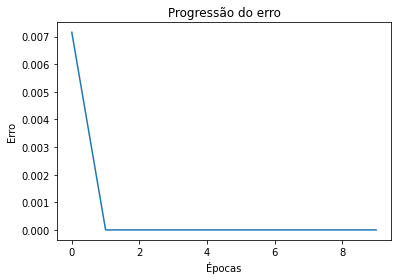

In [63]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [68]:
# salvando o modelo treinando em disco, com o nome 'modelo'
modelo.to_disk('modelo')

## **Etapa 6: Testes com uma frase**

In [69]:
# carregando o modelo treinado anteriormente
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [70]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [71]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [72]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [74]:
previsao.cats

{'ALEGRIA': 0.9979573488235474, 'MEDO': 0.000135861337184906}

In [75]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 4.539787187241018e-05, 'MEDO': 0.9999545812606812}

## **Etapa 7: Avaliação do modelo**

#### Avaliação na base de treinamento

In [77]:
previsoes = []
for texto in base_dados['texto']:
    # print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [78]:
previsoes

[{'ALEGRIA': 0.9996703863143921, 'MEDO': 0.0002415059570921585},
 {'ALEGRIA': 0.9998471736907959, 'MEDO': 0.0003244358522351831},
 {'ALEGRIA': 0.9995326995849609, 'MEDO': 0.00026434092433191836},
 {'ALEGRIA': 0.9998774528503418, 'MEDO': 0.00016693507495801896},
 {'ALEGRIA': 0.9998711347579956, 'MEDO': 8.451813482679427e-05},
 {'ALEGRIA': 0.9995357990264893, 'MEDO': 0.00019833864644169807},
 {'ALEGRIA': 0.9996919631958008, 'MEDO': 0.0003093854757025838},
 {'ALEGRIA': 0.9998911619186401, 'MEDO': 0.00013921476784162223},
 {'ALEGRIA': 0.9998478889465332, 'MEDO': 0.00029385150992311537},
 {'ALEGRIA': 0.9997401833534241, 'MEDO': 0.000324562075547874},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539787187241018e-05},
 {'ALEGRIA': 0.9996832609176636, 'MEDO': 0.00017012754688039422},
 {'ALEGRIA': 0.9997727274894714, 'MEDO': 0.0005198364960961044},
 {'ALEGRIA': 0.9997887015342712, 'MEDO': 0.00012999425234738737},
 {'ALEGRIA': 0.9996285438537598, 'MEDO': 0.00022152069141156971},
 {'ALEGRIA': 0.999

In [81]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')
    
previsoes_final = np.array(previsoes_final)

In [82]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [83]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [86]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

#### Avaliação na base de treinamento

In [88]:
base_dados_teste = pd.read_csv('/home/lucas/Documentos/Cursos/Udemy/Processamento de Linguagem Natural com spaCy e Python/1_Introdução/base_teste.txt')

In [90]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [91]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [92]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [94]:
previsoes = []
for texto in base_dados_teste['texto']:
    # print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [95]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [96]:
respostas_reais = base_dados_teste['emocao'].values

In [97]:
accuracy_score(respostas_reais, previsoes_final)

0.5357142857142857

In [98]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[34, 14],
       [25, 11]])